# Customer Churn Prediction Project

## Problem Statement
The objective of this project is to analyze customer data and build predictive models to identify customers who are likely to leave the bank.

In [1]:
# Import Required Liabraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving European_Bank.csv to European_Bank (2).csv


In [3]:
# Load Dataset

df = pd.read_csv('European_Bank.csv')

In [4]:
df.head()

,Year,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2025,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2025,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,2025,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,2025,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,2025,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The dataset contains customer details including demographics, banking behavior
and churn status (Exited column).

In [5]:
df.shape

(10000, 14)

In [6]:
df.columns

Index(['Year', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()

,Year,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.0,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,2025.0,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,0.0,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,2025.0,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2025.0,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,2025.0,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,2025.0,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,2025.0,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
# Check missing values

df.isnull().sum()

,0
Year,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


The datset contains 10000 customers. No major values are missing.

In [10]:
# Drop irrelevant columns

df.drop(columns=['CustomerId', 'Surname'], inplace = True)
df.head()

,Year,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2025,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2025,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,2025,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,2025,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,2025,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


There is no need for CustomerId and Surname so they are removed.

In [11]:
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[18,30,45,60,100],
    labels=['Young', 'Adult', 'Middle', 'Senior']
)

df.head()

,Year,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,2025,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Adult
1,2025,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Adult
2,2025,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Adult
3,2025,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Adult
4,2025,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Adult


We have grouped customers under different age groups to better understand the churn patterns.

In [12]:
df['Engagement'] = df['IsActiveMember'].map({1:'Active', 0:'Inactive'})
df.head()

,Year,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,Engagement
0,2025,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Adult,Active
1,2025,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Adult,Active
2,2025,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Adult,Inactive
3,2025,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Adult,Inactive
4,2025,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Adult,Active


Engagement level is expected to significantaly impact the churn. Inactive customers are likely to leave.

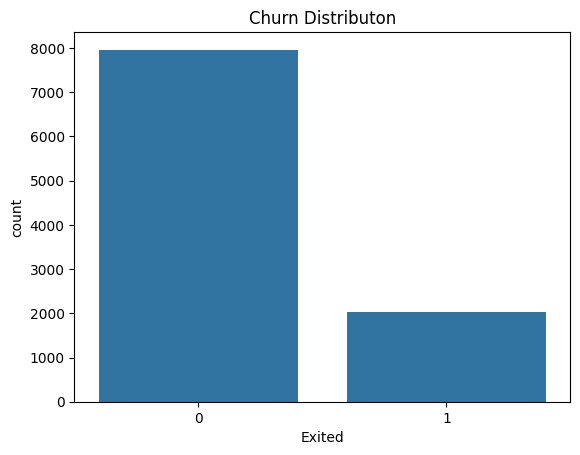

Churn Rate: 0.2037


In [13]:
sns.countplot(x='Exited', data=df)
plt.title("Churn Distributon")
plt.show()

print("Churn Rate:", df["Exited"].mean())

Approximately 20% of customers have exited the bank. This indicates a moderate churn issue requiring retention strategies.

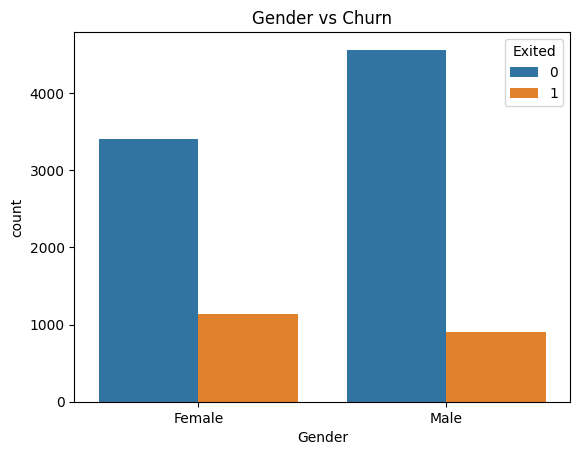

In [14]:
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Gender vs Churn')
plt.show()

Female customers show slightly higher churn compared to male customers. This suggests gender may have a minor influence on churn behavior.

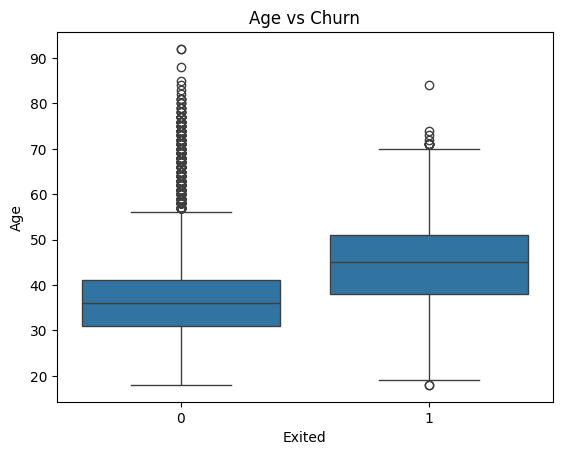

In [15]:
sns.boxplot(x="Exited", y="Age", data=df)
plt.title("Age vs Churn")
plt.show()

Older customers show higher churn rate. Age appears to be a strong predictor possibly because older customers may switch banks due to service dissatisfaction or retirement related changes.

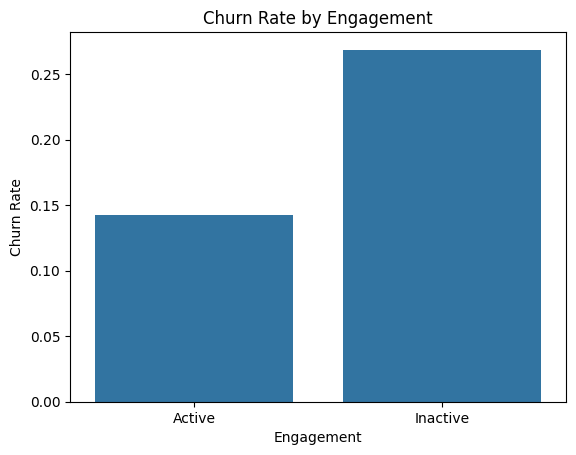

,Exited
Engagement,
Active,0.142691
Inactive,0.268509


In [16]:
engagement_churn = df.groupby("Engagement")["Exited"].mean()

sns.barplot(x=engagement_churn.index, y=engagement_churn.values)
plt.title("Churn Rate by Engagement")
plt.ylabel("Churn Rate")
plt.show()

engagement_churn

Inactive customers show significantly higher churn rates compared to active customers. Engagement level appears to be one of the strongest predictors of churn.

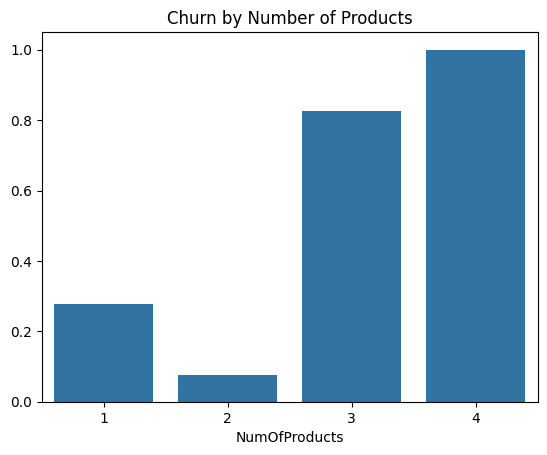

,Exited
NumOfProducts,
1,0.277144
2,0.075817
3,0.827068
4,1.000000


In [17]:
product_churn=df.groupby("NumOfProducts")["Exited"].mean()

sns.barplot(x=product_churn.index, y=product_churn.values)
plt.title("Churn by Number of Products")
plt.show()

product_churn

Customers with only 1 product show moderate churn, while customers with 3-4 products show unusual churn patterns. This indicate dissatisfaction among highly engaged customers .

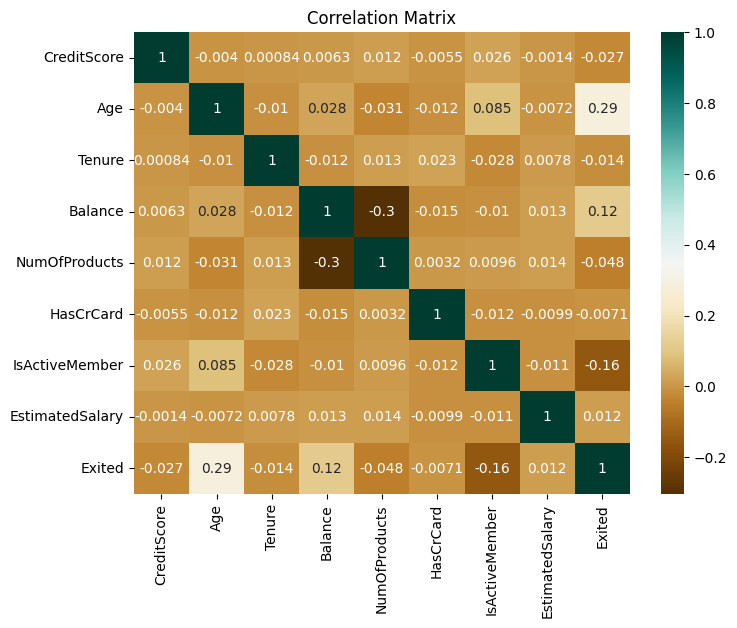

In [18]:
df.drop("Year", axis=1, inplace=True)

numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="BrBG")
plt.title("Correlation Matrix")
plt.show()

1) Age(0.29) shows strongest correlation with churn.
2) IsActiveMember(-0.16) negatively correlates with churn.
3) Balance(0.12) shows slightly positive correlation.
4) Salary, Tenure, Credit Score have almost no direct impact.

In [19]:
# Convert variables into numeric

df_model = pd.get_dummies(df, drop_first=True)

x = df_model.drop("Exited", axis=1)
y = df_model["Exited"]

In [20]:
print("Feature Shape:", x.shape)
print("Target Shape", y.shape)

Feature Shape: (10000, 15)
Target Shape (10000,)


We convert categorical data into numeric so machine learning models can understand them.

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training Data:", x_train.shape)
print("Testing Data:", x_test.shape)

Training Data: (8000, 15)
Testing Data: (2000, 15)


We train on 80% data and test on 20% data to evaluate real-world performance.


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [23]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train, y_train)

y_pred = log_model.predict(x_test)



In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.835

Confusion Matrix:
[[1548   59]
 [ 271  122]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1607
           1       0.67      0.31      0.43       393

    accuracy                           0.83      2000
   macro avg       0.76      0.64      0.66      2000
weighted avg       0.82      0.83      0.81      2000



In [25]:
from sklearn.metrics import roc_auc_score
y_prob = log_model.predict_proba(x_test)[:,1]
roc_score = roc_auc_score(y_test, y_prob)

print("ROC-AUC Score:", round(roc_score,2))


ROC-AUC Score: 0.79


A ROC-AUC score of 0.79 indicates that the model has good classification ability and can differentiate between churn and non-churn customers with reasonable accuracy.

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

rf_pred = rf_model.predict(x_test)

print("RF Accuracy:", accuracy_score(y_test, rf_pred))

RF Accuracy: 0.863


Random Forest achieved a higher accuracy of 86% compared to Logistic Regression. This suggests that churn bheviour may involve non-linear patterns that tree-based models can capture better.

## Final Conclusion

1. Approximately 20% of customers have churned.
2. Older customers show higher churn rates.
3. Inactive customers are significantly more likely to leave.
4. Customers with fewer products tend to churn more.
5. Random Forest provided the best performance with 86% accuracy.
6. Engagement and Age are strongest churn indicators.

## Recommendations

1. Target inactive customers with campaigns.
2. Provide loyalty benefits to old customers.
3. Offer bundled product discounts to increase product sell.
